**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "results.Log2FC.Merge.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_crispr_guides = dat
print(dim(dat))
head(dat)

Rows: 176457 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Peak, Guide, Gene
dbl (1): Log2FC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 176457      4


Peak,Guide,Gene,Log2FC
<chr>,<chr>,<chr>,<dbl>
chr11_4092104_4092566,chr11_4092122_4092123,HBE1,-1.101030
chr11_4092104_4092566,chr11_4092123_4092124,HBE1,-0.061961
chr11_4092104_4092566,chr11_4092130_4092131,HBE1,0.528464
chr11_4092104_4092566,chr11_4092135_4092136,HBE1,0.497477
chr11_4092104_4092566,chr11_4092162_4092163,HBE1,-0.190223
chr11_4092104_4092566,chr11_4092163_4092164,HBE1,-1.781920


In [3]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "results.summary.Merge.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_crispr_sum = dat
print(dim(dat))
head(dat)

Rows: 3084 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Peak, Gene
dbl (7): Mean, Median, Max, Min, Count, Mean_Neg, Mean_Pos

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3084    9


Peak,Gene,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_33065336_33066228,CAPRIN1,-0.27343935,-0.2533300,1.82911,-2.32196,46,-0.5695431,0.4782085
chr11_33065336_33066228,CAT,-0.01256696,-0.1384765,1.43868,-1.77410,46,-0.5122241,0.6369873
chr11_33065336_33066228,LMO2,0.03675483,-0.0071000,1.09905,-1.14702,46,-0.4276747,0.5011843
chr11_33068519_33069100,CAPRIN1,-0.11785479,-0.0847600,1.64429,-2.01338,53,-0.4252182,0.4797963
chr11_33068519_33069100,CAT,-0.15932204,-0.1697360,2.12211,-2.59035,53,-0.6266582,0.6769637
chr11_33068519_33069100,LMO2,-0.08303026,-0.1090310,2.73010,-2.25265,53,-0.5389359,0.5116293


In [4]:
fdiry = file.path(FD_RES, "results", "region")
fname = "region_screened_crispri_flowfish.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Gene")
dat = read_tsv(fpath, col_names = cnames)

dat_crispr_screen = dat
print(dim(dat))
dat

Rows: 13 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Gene
dbl (2): Start, End

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 13  4


Chrom,Start,End,Gene
<chr>,<dbl>,<dbl>,<chr>
chr11,4091884,6419310,"HBE1,HBG1,HBG2,HBS1L,MYB"
chr11,33064196,34664117,"CAPRIN1,CAT,LMO2"
chr11,61788524,61897153,"FADS1,FADS2,FADS3,FEN1"
chr12,54300766,54301042,"GATA1,HDAC6"
chr12,110726151,112325737,ERP29
chr19,12887110,12887237,"GATA1,HDAC6"
chr3,128487571,128487937,"GATA1,HDAC6"
chr4,55237590,56068531,NMU
chr5,87611207,89911163,MEF2C


In [12]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.crispri_casa_peak.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)
dat = dat %>% dplyr::rename(Gene = Gene_Symbol)

dat_crispr_casa = dat
print(dim(dat))
head(dat)

Rows: 87 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Peak, CASA, Gene_Symbol, Gene_ENS
dbl (2): Score, Overlap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 87  6


Peak,CASA,Score,Gene,Gene_ENS,Overlap
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
chr11_5249943_5250880,chr11_5249847_5250847,1.890890,HBG1,ENST00000330597.5,904
chr11_5249943_5250880,chr11_5249847_5250847,1.922956,HBG2,ENST00000336906.6,904
chr11_5254190_5254453,chr11_5253647_5254647,1.504404,HBG1,ENST00000330597.5,263
chr11_5254190_5254453,chr11_5253647_5254647,1.430535,HBG2,ENST00000336906.6,263
chr11_5269440_5270695,chr11_5269147_5271147,1.906478,HBE1,ENST00000336906.6,1255
chr11_5275424_5276195,chr11_5275847_5276247,1.173871,HBG1,ENST00000330597.5,348


## Label peaks with CASA directions

**Question: for one target gene, is there any peak contain casa peaks with pos and neg scores?**

In [24]:
dat = dat_crispr_casa
dat = dat %>% 
    dplyr::mutate(Sign = ifelse(Score > 0, "pos", "neg")) %>%
    dplyr::group_by(Peak, Gene) %>%
    dplyr::summarize(
        Sign = paste(Sign, collapse=","),
        .groups = "drop"
    )

table(dat$Sign)


    neg     pos pos,pos 
     11      72       2 

**Answer: No**

In [46]:
dat = dat_crispr_casa
dat = dat %>% 
    dplyr::mutate(Sign = ifelse(Score > 0, "pos", "neg")) %>%
    dplyr::group_by(Peak, Gene) %>%
    dplyr::summarize(
        Sign = paste(unique(Sign), collapse=","),
        .groups = "drop"
    )

dat_peak_crispr_label = dat
print(table(dat$Sign))
print(dim(dat))
head(dat)


neg pos 
 11  74 
[1] 85  3


Peak,Gene,Sign
<chr>,<chr>,<chr>
chr11_33868682_33871379,LMO2,pos
chr11_33880631_33881416,LMO2,pos
chr11_33881831_33882405,LMO2,pos
chr11_33936760_33937819,LMO2,pos
chr11_33941500_33942221,LMO2,pos
chr11_33944510_33945297,CAPRIN1,pos


## Plot distribution of summary scores

In [53]:
dat = left_join(
    dat_peak_crispr_sum,
    dat_peak_crispr_label,
    by = c("Peak", "Gene")
)

dat = dat %>% replace(is.na(.), "null")

dat_score = dat
print(dim(dat))
head(dat)

[1] 3084   10


Peak,Gene,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos,Sign
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11_33065336_33066228,CAPRIN1,-0.27343935,-0.2533300,1.82911,-2.32196,46,-0.5695431,0.4782085,null
chr11_33065336_33066228,CAT,-0.01256696,-0.1384765,1.43868,-1.77410,46,-0.5122241,0.6369873,null
chr11_33065336_33066228,LMO2,0.03675483,-0.0071000,1.09905,-1.14702,46,-0.4276747,0.5011843,null
chr11_33068519_33069100,CAPRIN1,-0.11785479,-0.0847600,1.64429,-2.01338,53,-0.4252182,0.4797963,null
chr11_33068519_33069100,CAT,-0.15932204,-0.1697360,2.12211,-2.59035,53,-0.6266582,0.6769637,null
chr11_33068519_33069100,LMO2,-0.08303026,-0.1090310,2.73010,-2.25265,53,-0.5389359,0.5116293,null


In [56]:
theme_text = theme(
    axis.title.x = element_blank()
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

theme_legend = theme(
    legend.position = "none"
)

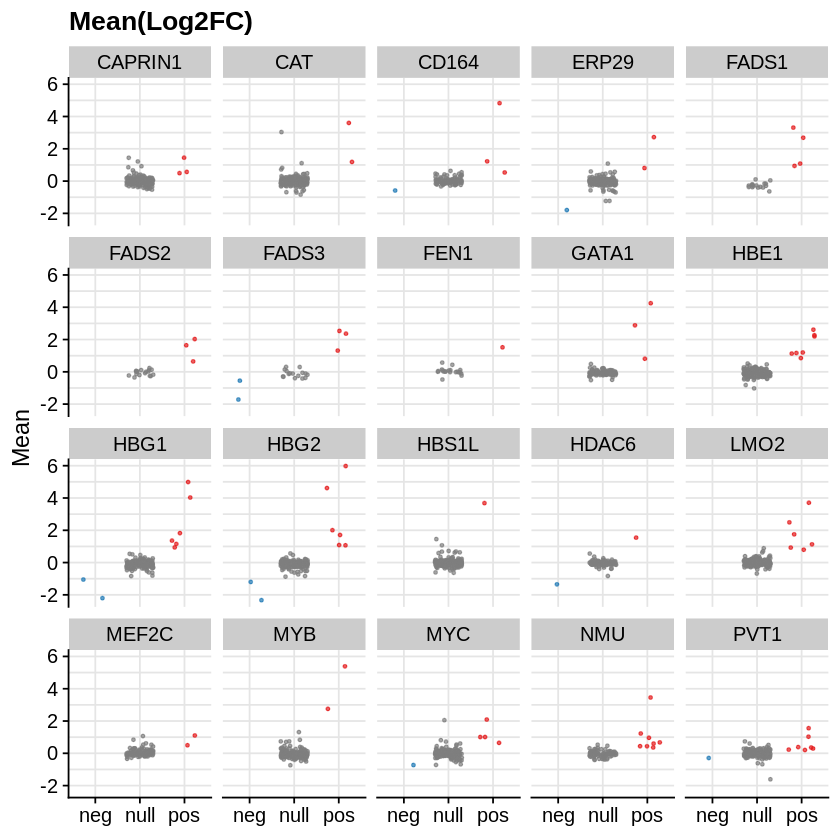

In [70]:
dat = dat_score

set.seed(123)
gpt = ggplot(dat, aes(x=Sign, y=Mean, color=Sign)) + 
    geom_jitter(size = 0.7, width = 0.3, alpha = 0.7) + 
    facet_wrap(~Gene)

gpt = gpt +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey50", "neg"="#1f78b4")) +
    labs(title = "Mean(Log2FC)") +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend

options(repr.plot.width = 7, repr.plot.height = 7)
print(gpt)

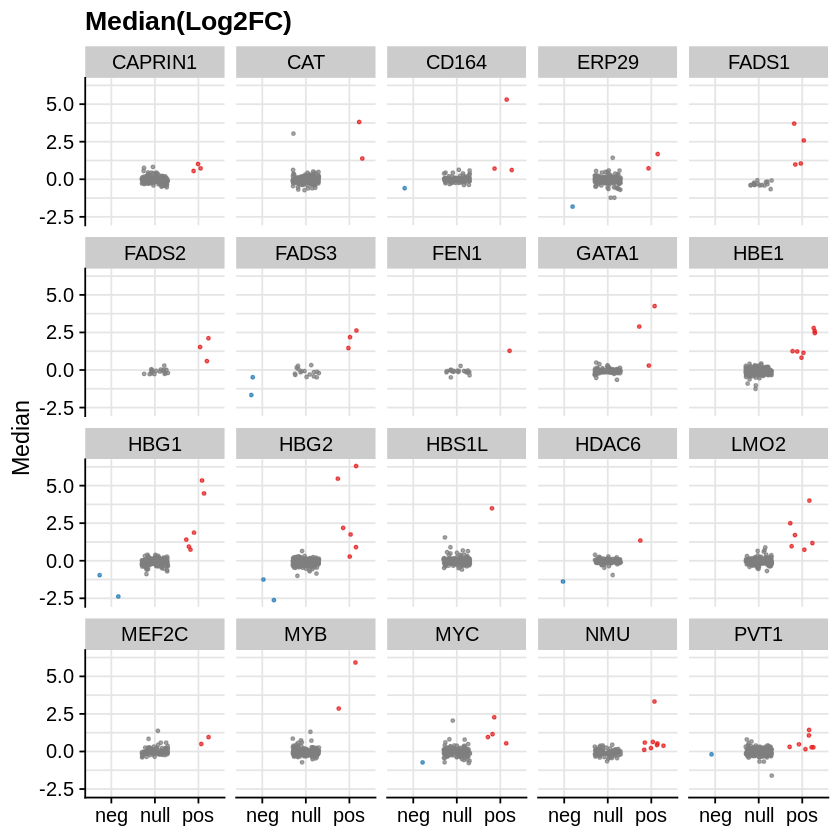

In [71]:
dat = dat_score

set.seed(123)
gpt = ggplot(dat, aes(x=Sign, y=Median, color=Sign)) + 
    geom_jitter(size = 0.7, width = 0.3, alpha = 0.7) + 
    facet_wrap(~Gene)

gpt = gpt +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey50", "neg"="#1f78b4")) +
    labs(title = "Median(Log2FC)") +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend

options(repr.plot.width = 7, repr.plot.height = 7)
print(gpt)

## Plot overall distribution of guides

In [47]:
dat = left_join(
    dat_peak_crispr_guides,
    dat_peak_crispr_label,
    by = c("Peak", "Gene")
)

dat = dat %>% replace(is.na(.), "null")

dat_score = dat
print(dim(dat))
head(dat)

[1] 176457      5


Peak,Guide,Gene,Log2FC,Sign
<chr>,<chr>,<chr>,<dbl>,<chr>
chr11_4092104_4092566,chr11_4092122_4092123,HBE1,-1.101030,null
chr11_4092104_4092566,chr11_4092123_4092124,HBE1,-0.061961,null
chr11_4092104_4092566,chr11_4092130_4092131,HBE1,0.528464,null
chr11_4092104_4092566,chr11_4092135_4092136,HBE1,0.497477,null
chr11_4092104_4092566,chr11_4092162_4092163,HBE1,-0.190223,null
chr11_4092104_4092566,chr11_4092163_4092164,HBE1,-1.781920,null


In [50]:
theme_text = theme(
    axis.title.x = element_blank()
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

theme_legend = theme(
    legend.position = "none"
)

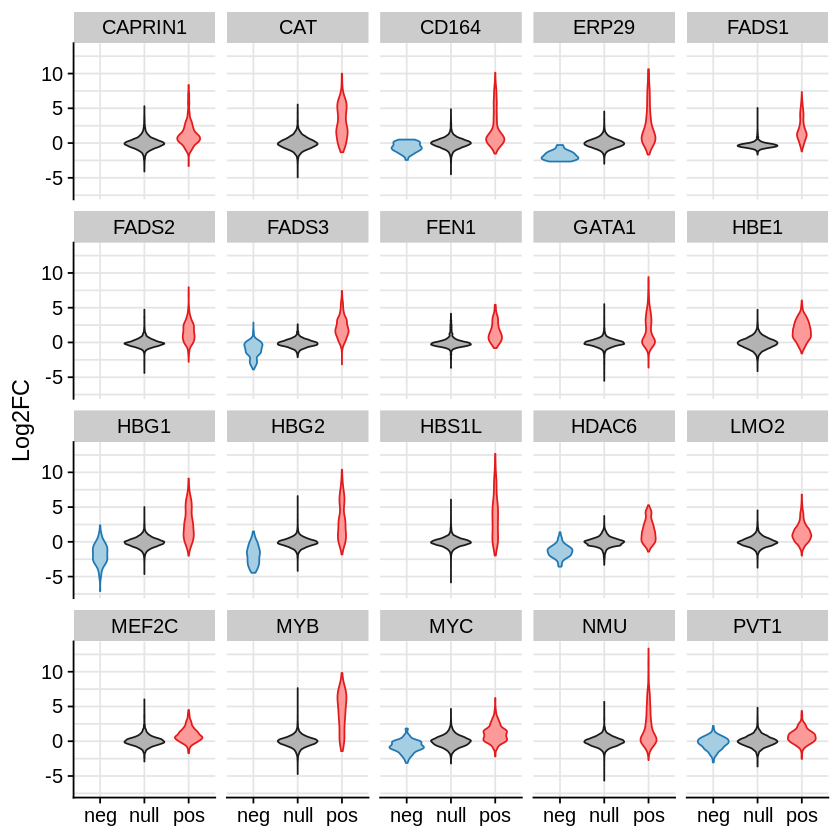

In [51]:
dat = dat_score

gpt = ggplot(dat, aes(x=Sign, y=Log2FC, color=Sign, fill=Sign)) + 
    geom_violin() + 
    facet_wrap(~Gene)
    
gpt = gpt +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey10", "neg"="#1f78b4")) +
    scale_fill_manual( values = c("pos"="#fb9a99", "null"="grey70", "neg"="#a6cee3")) +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend

options(repr.plot.width = 7, repr.plot.height = 7)
print(gpt)

## Prepare for plotting peak by peak for each gene

In [60]:
peaks_filter = dat_peak_crispr_sum %>%
    dplyr::filter(Count > 10) %>% 
    dplyr::pull(Peak)

In [69]:
dat = dat_crispr_casa 
dat = dat %>% 
    dplyr::mutate(
        Gene  = Gene_Symbol,
        Label = ifelse(Score > 0, "pos", "neg")) %>%
    dplyr::select(Peak, Gene, Label) %>%
    dplyr::group_by(Peak, Gene) %>%
    dplyr::summarise(
        Label   = paste(unique(Label), collapse=","),
        .groups = "drop"
    )

dat_peak_label = dat
print(dim(dat))
print(table(dat$Label))
head(dat)

[1] 85  3

neg pos 
 11  74 


Peak,Gene,Label
<chr>,<chr>,<chr>
chr11_33868682_33871379,LMO2,pos
chr11_33880631_33881416,LMO2,pos
chr11_33881831_33882405,LMO2,pos
chr11_33936760_33937819,LMO2,pos
chr11_33941500_33942221,LMO2,pos
chr11_33944510_33945297,CAPRIN1,pos


In [71]:
###
genes = c("GATA1,HDAC6")
genes = unlist(str_split(genes, ","))

###
peaks_label = dat_crispr_casa %>% 
    dplyr::filter(Gene_Symbol %in% genes) %>% 
    dplyr::pull(Peak)

###
dat = dat_peak_crispr_guides
dat = dat %>% 
    dplyr::filter(
        Peak %in% peaks_filter,
        Gene %in% genes
    ) %>%
    dplyr::left_join(dat_peak_label, by=c("Peak", "Gene")) %>%
    replace(is.na(.), "null")

head(dat)

Peak,Guide,Gene,Log2FC,Sign,Label
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
chrX_48429481_48430647,chrX_48429498_48429499,GATA1,0.378660,pos,null
chrX_48429481_48430647,chrX_48429499_48429500,GATA1,0.449798,pos,null
chrX_48429481_48430647,chrX_48429503_48429504,GATA1,-0.357353,neg,null
chrX_48429481_48430647,chrX_48429533_48429534,GATA1,-0.129721,neg,null
chrX_48429481_48430647,chrX_48429534_48429535,GATA1,-0.129053,neg,null
chrX_48429481_48430647,chrX_48429542_48429543,GATA1,0.196117,pos,null


## Plot CRISPR guide distribution

In [28]:
theme_text = theme(
    axis.text.x = element_blank()
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

theme_legend = theme(
    legend.position = "none"
)

In [12]:
genes = c("GATA1,HDAC6")
genes = unlist(str_split(genes, ","))

dat = dat_crispr_casa
dat = dat %>%
    dplyr::filter(Gene_Symbol %in% genes)

peaks_label = dat$Peak
head(dat)

Peak,CASA,Score,Gene_Symbol,Gene_ENS,Overlap
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
chrX_48782524_48783758,chrX_48782597_48783497,2.231263,GATA1,ENSG00000102145,900
chrX_48785773_48786737,chrX_48786097_48786997,3.708137,GATA1,ENSG00000102145,640
chrX_48785773_48786737,chrX_48786297_48786997,-1.425316,HDAC6,ENSG00000094631,440
chrX_48800352_48802804,chrX_48800197_48801297,2.398983,GATA1,ENSG00000102145,945
chrX_48800352_48802804,chrX_48800297_48801097,1.396662,HDAC6,ENSG00000094631,745
chrX_48800352_48802804,chrX_48801697_48802997,2.587553,HDAC6,ENSG00000094631,1107


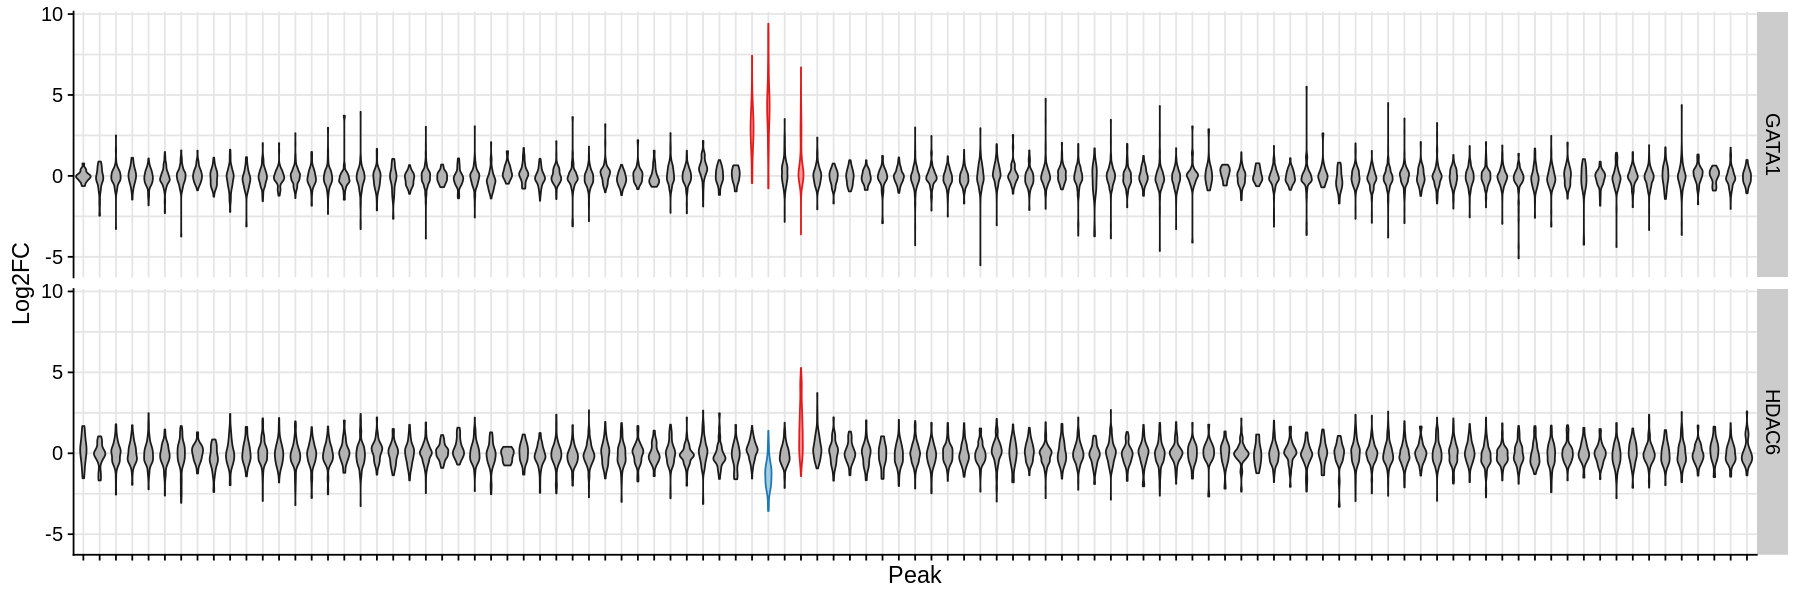

In [72]:
###
genes = c("GATA1,HDAC6")
genes = unlist(str_split(genes, ","))

###
dat = dat_peak_crispr_guides
dat = dat %>% 
    dplyr::filter(
        Peak %in% peaks_filter,
        Gene %in% genes
    ) %>%
    dplyr::left_join(dat_peak_label, by=c("Peak", "Gene")) %>%
    replace(is.na(.), "null")

###
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, color=Label, fill=Label)) + 
    geom_violin() +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey10", "neg"="#1f78b4")) +
    scale_fill_manual( values = c("pos"="#fb9a99", "null"="grey70", "neg"="#a6cee3")) +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend +
    facet_grid(Gene~.)

###
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

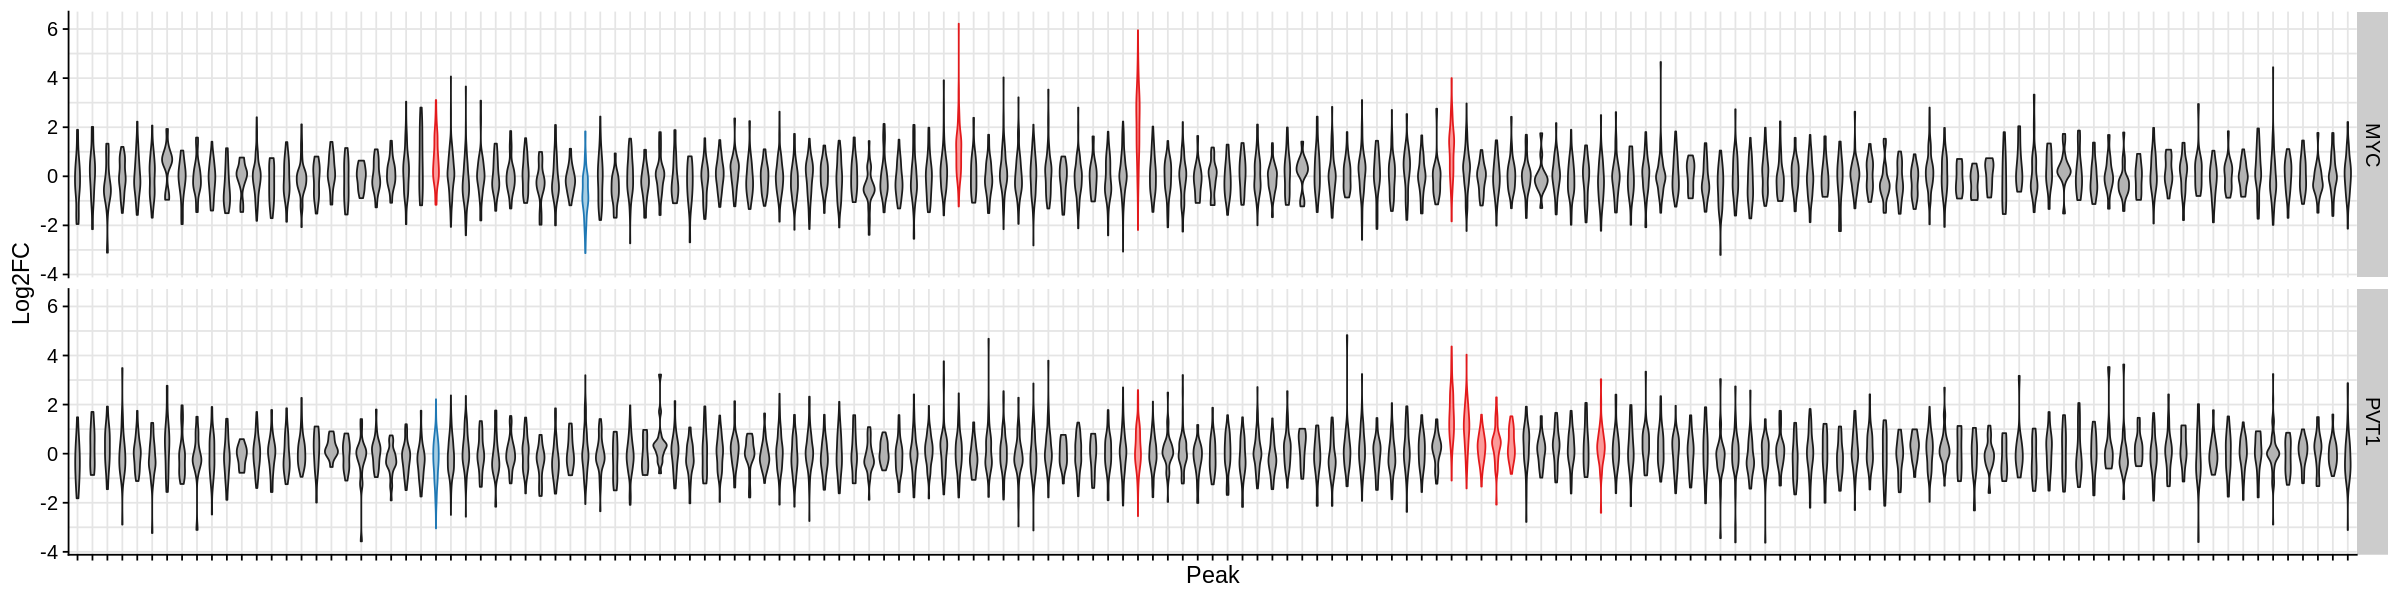

In [73]:
###
genes = c("MYC,PVT1")
genes = unlist(str_split(genes, ","))

###
dat = dat_peak_crispr_guides
dat = dat %>% 
    dplyr::filter(
        Peak %in% peaks_filter,
        Gene %in% genes
    ) %>%
    dplyr::left_join(dat_peak_label, by=c("Peak", "Gene")) %>%
    replace(is.na(.), "null")

###
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, color=Label, fill=Label)) + 
    geom_violin() +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey10", "neg"="#1f78b4")) +
    scale_fill_manual( values = c("pos"="#fb9a99", "null"="grey70", "neg"="#a6cee3")) +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend +
    facet_grid(Gene~.)

###
options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

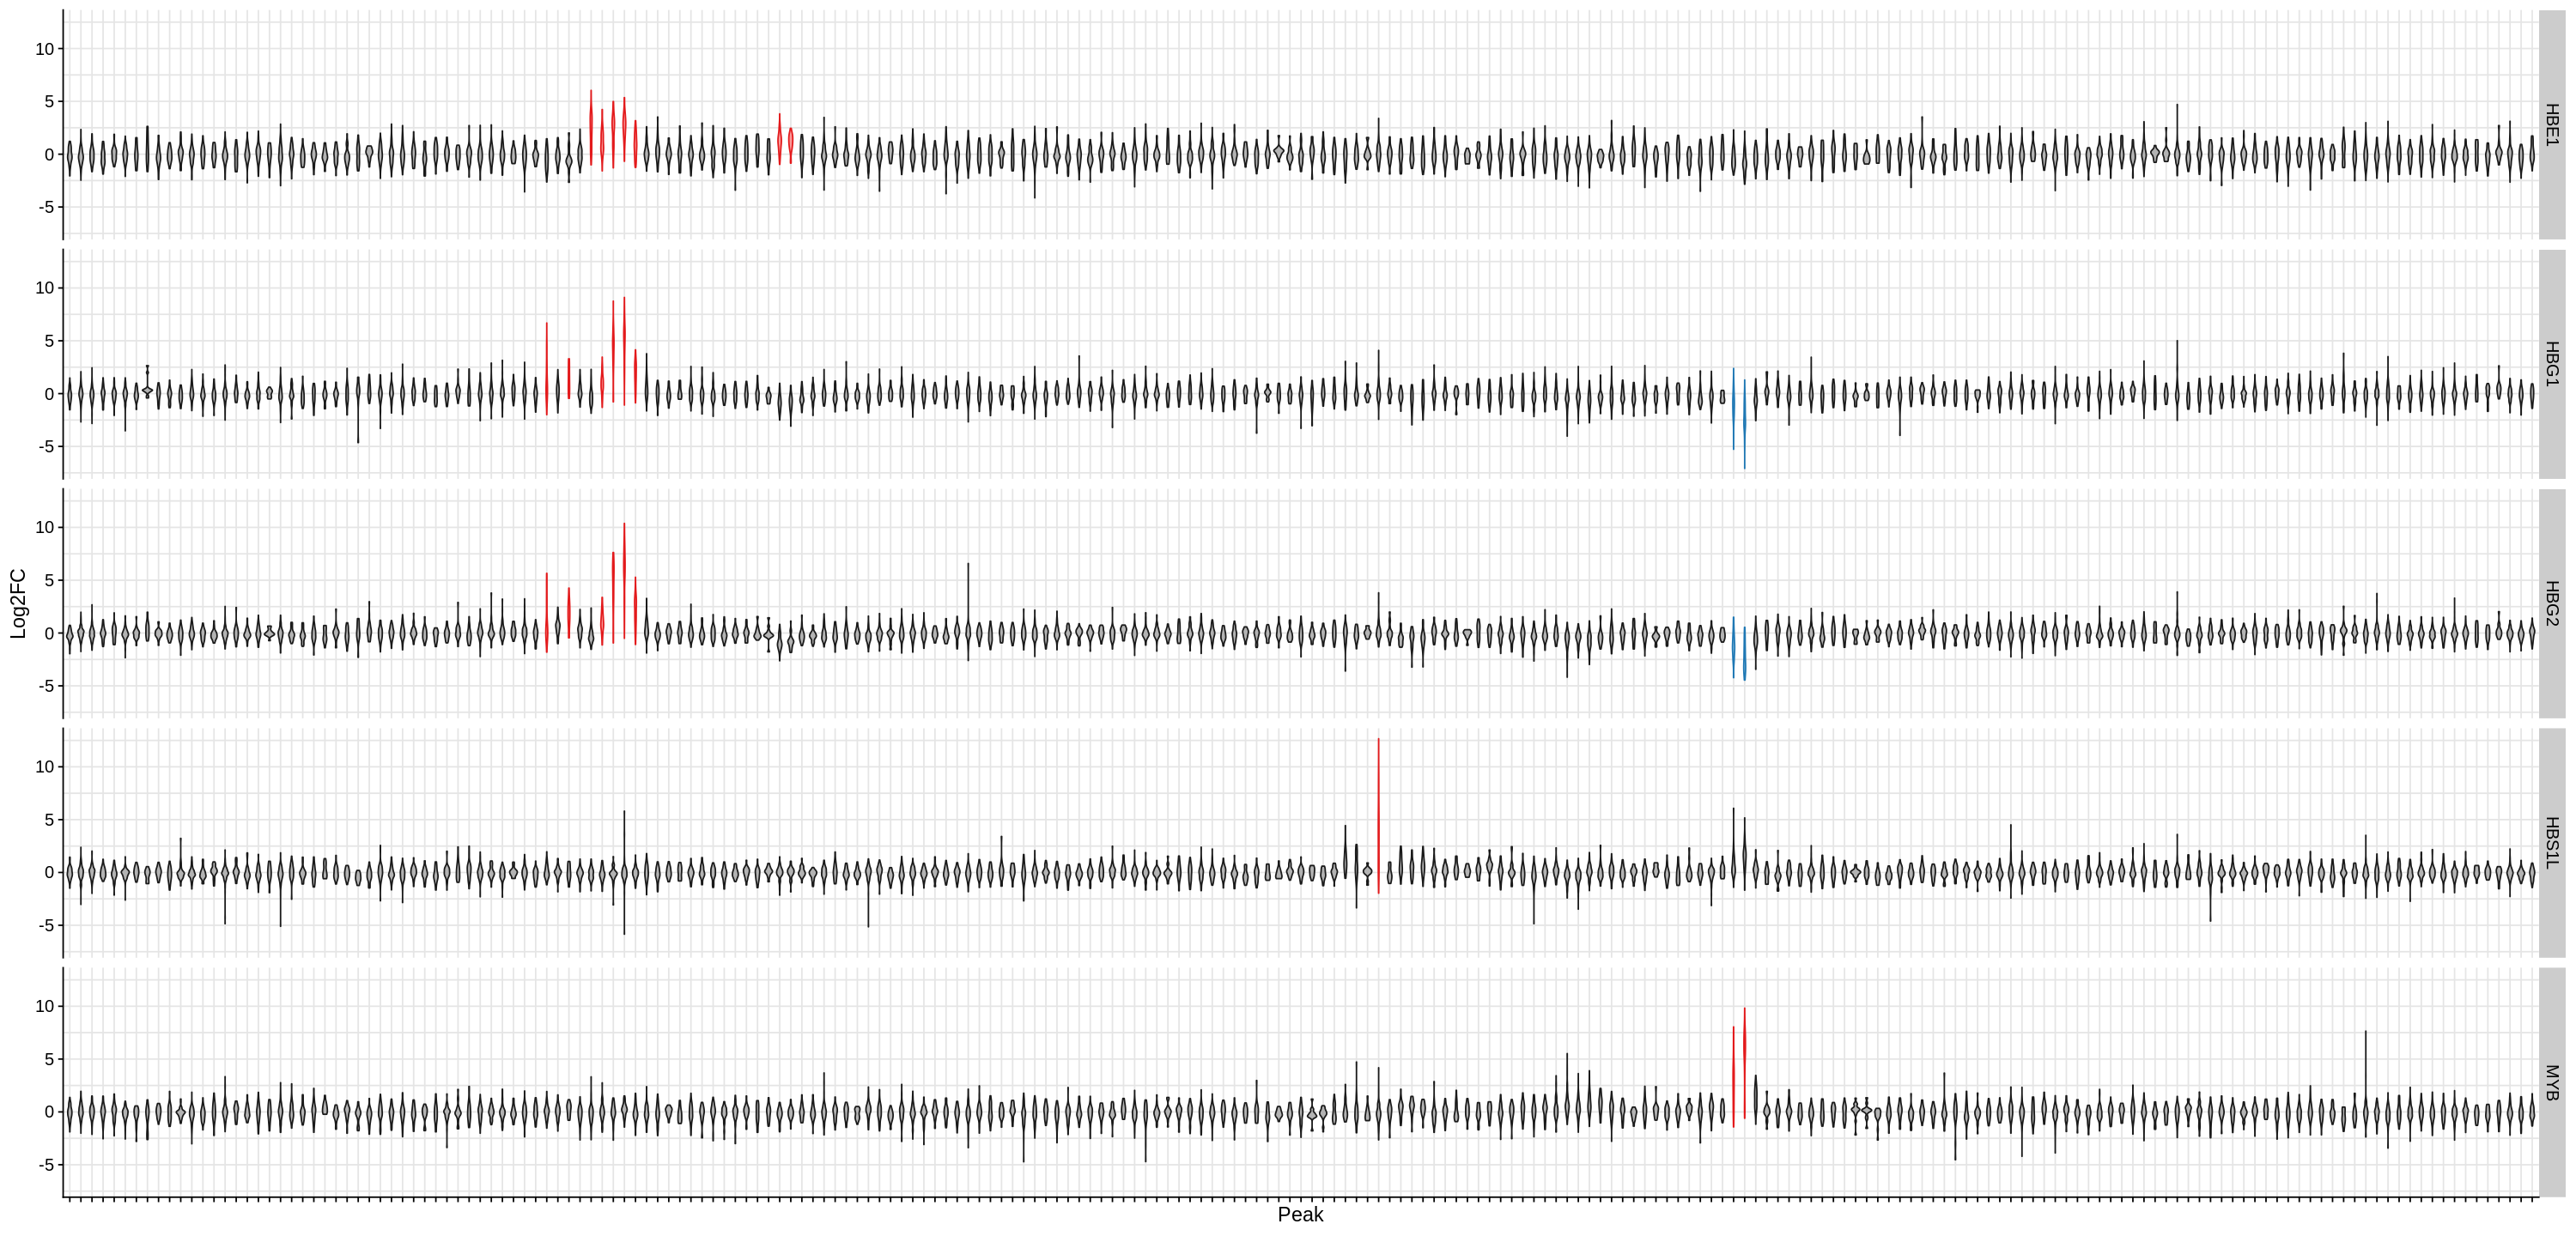

In [78]:
genes = c("HBE1,HBG1,HBG2,HBS1L,MYB")
genes = unlist(str_split(genes, ","))

###
dat = dat_peak_crispr_guides
dat = dat %>% 
    dplyr::filter(
        Peak %in% peaks_filter,
        Gene %in% genes
    ) %>%
    dplyr::left_join(dat_peak_label, by=c("Peak", "Gene")) %>%
    replace(is.na(.), "null")

###
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, color=Label, fill=Label)) + 
    geom_violin() +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey10", "neg"="#1f78b4")) +
    scale_fill_manual( values = c("pos"="#fb9a99", "null"="grey70", "neg"="#a6cee3")) +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend +
    facet_grid(Gene~.)

###
options(repr.plot.height=12, repr.plot.width=25)
print(gpt)

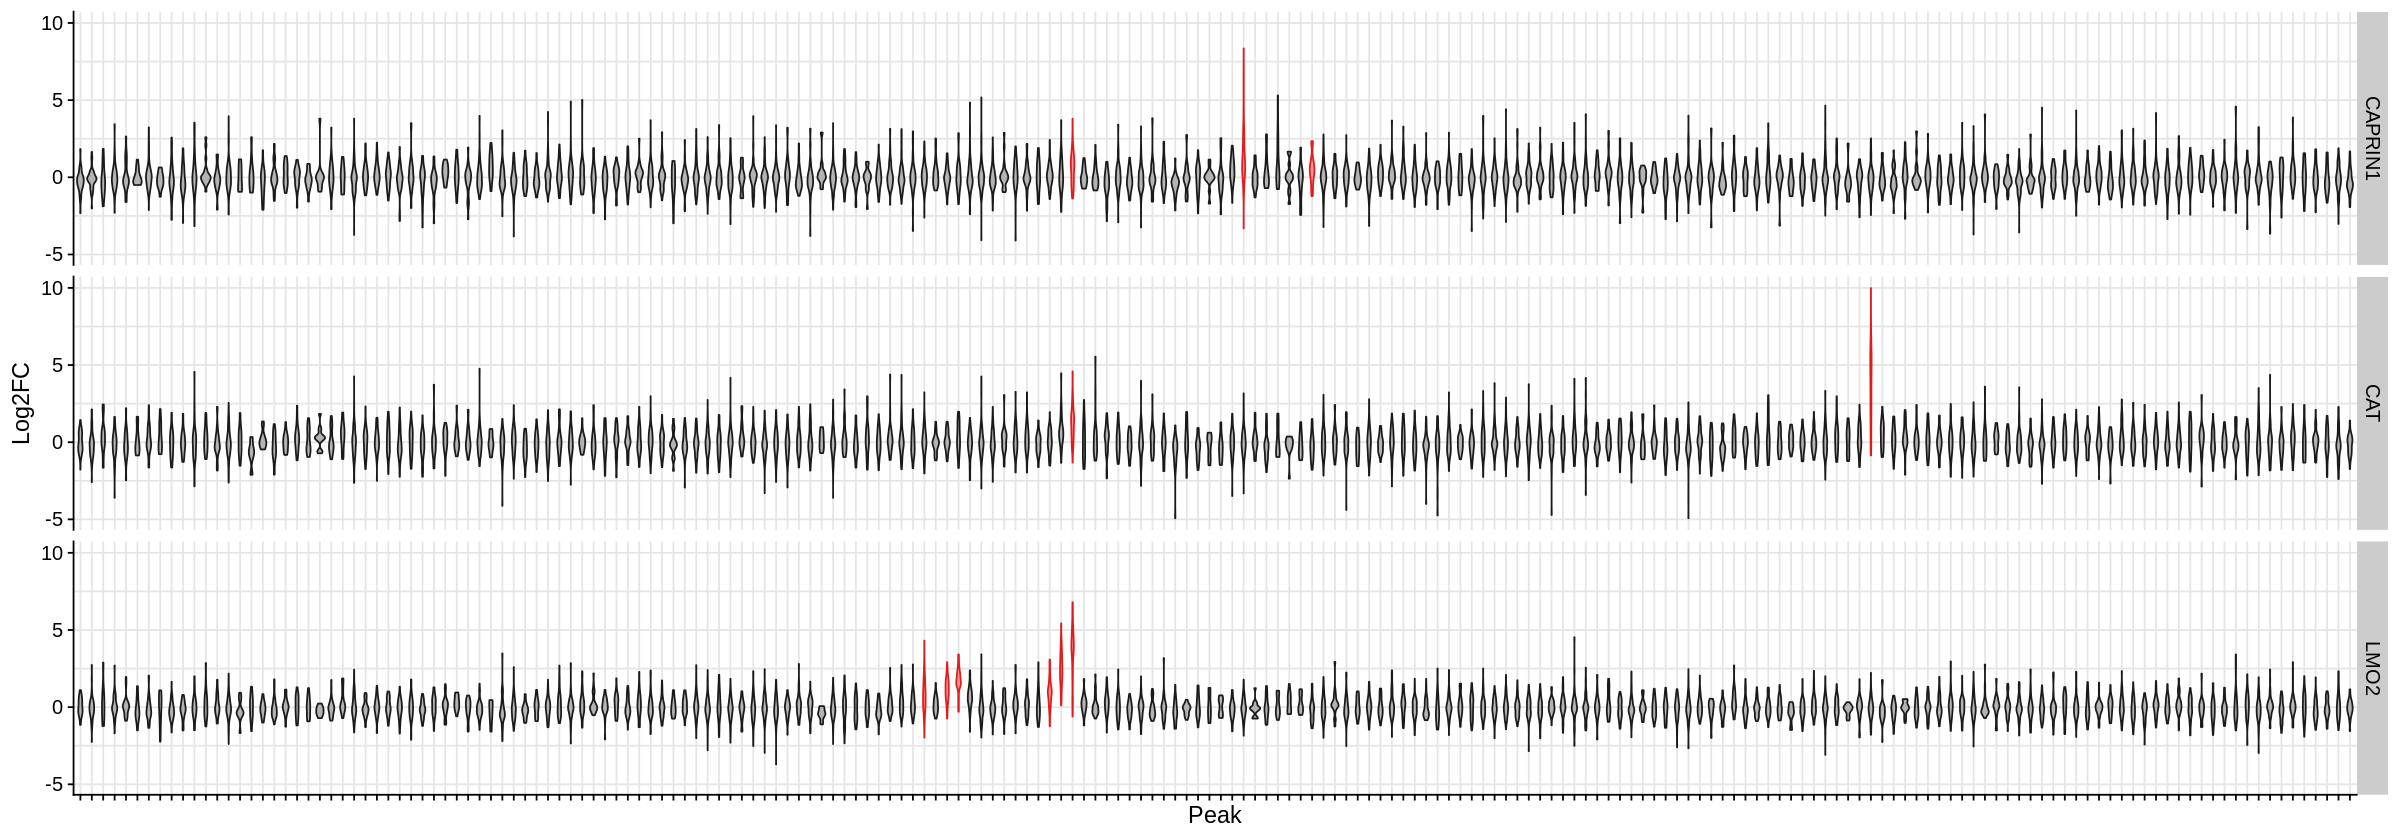

In [77]:
###
genes = c("CAPRIN1,CAT,LMO2")
genes = unlist(str_split(genes, ","))

###
dat = dat_peak_crispr_guides
dat = dat %>% 
    dplyr::filter(
        Peak %in% peaks_filter,
        Gene %in% genes
    ) %>%
    dplyr::left_join(dat_peak_label, by=c("Peak", "Gene")) %>%
    replace(is.na(.), "null")

###
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, color=Label, fill=Label)) + 
    geom_violin() +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey10", "neg"="#1f78b4")) +
    scale_fill_manual( values = c("pos"="#fb9a99", "null"="grey70", "neg"="#a6cee3")) +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend +
    facet_grid(Gene~.)

###
options(repr.plot.height=7, repr.plot.width=20)
print(gpt)

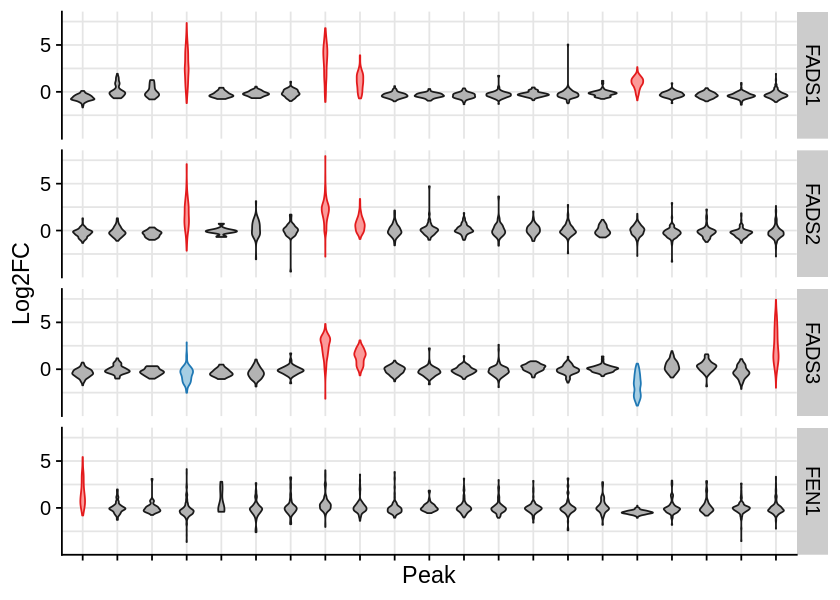

In [82]:
###
genes = c("FADS1,FADS2,FADS3,FEN1")
genes = unlist(str_split(genes, ","))

###
dat = dat_peak_crispr_guides
dat = dat %>% 
    dplyr::filter(
        Peak %in% peaks_filter,
        Gene %in% genes
    ) %>%
    dplyr::left_join(dat_peak_label, by=c("Peak", "Gene")) %>%
    replace(is.na(.), "null")

###
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, color=Label, fill=Label)) + 
    geom_violin() +
    scale_color_manual(values = c("pos"="#e31a1c", "null"="grey10", "neg"="#1f78b4")) +
    scale_fill_manual( values = c("pos"="#fb9a99", "null"="grey70", "neg"="#a6cee3")) +
    theme_cowplot() + 
    theme_text +
    theme_grid +
    theme_legend +
    facet_grid(Gene~.)

###
options(repr.plot.height=5, repr.plot.width=7)
print(gpt)